# DAMAGE PREDICTION

- Prediction of Damage in  Nepal with Logistic Regression

### GOALS

    - Prepare data for Binary classification.

    - Create logistic model to predict damage.

    - Explain Model prediction using odd-ratio


## Workflow

    -  `Import`

    -  `Explore`

    -  `Split`

    -   `Build Model`
            
            - `Baseline (Accuracy Score)`

            - Apply Logistic regression 

### Libraries

In [1]:
# importing packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

In [16]:
# Load data from csv file 
nepal_data = pd.read_csv("nepal_dataset.csv" )
nepal_data.head()



,b_id,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
0,164002,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar",Grade 2
1,164081,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
2,164089,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
3,164098,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3
4,164103,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3


In [43]:
# Wrangle function

def wrangle (df):
    # Setting first column as index
    df = df.set_index(df.columns[0])

    # Identify Leaky features and drop it 
    df.drop(columns = [col for col in df.columns if "post_eq" in col] , inplace =True)

    # New bianry target feature
    df["severe_damage"] = (df["damage_grade"].str[-1].astype(int) >3).astype(int) 

    # dropping damage_grade column
    df.drop(columns = "damage_grade", inplace =True)

    # drop multicollinear feature
    df.drop(columns = "count_floors_pre_eq", inplace=True)

    # drop building id
    df.drop(columns = "building_id", inplace=True)
    
    return df

In [18]:
nepal=wrangle(nepal_data)

nepal.head()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
b_id,,,,,,,,,,,,,,,,,
164002,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar",Grade 2
164081,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
164089,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
164098,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3
164103,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3


In [19]:
# Checking for Leaky features 
print(nepal.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 164002 to 234835
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   building_id             70836 non-null  int64 
 1   count_floors_pre_eq     70836 non-null  int64 
 2   count_floors_post_eq    70836 non-null  int64 
 3   age_building            70836 non-null  int64 
 4   plinth_area_sq_ft       70836 non-null  int64 
 5   height_ft_pre_eq        70836 non-null  int64 
 6   height_ft_post_eq       70836 non-null  int64 
 7   land_surface_condition  70836 non-null  object
 8   foundation_type         70836 non-null  object
 9   roof_type               70836 non-null  object
 10  ground_floor_type       70836 non-null  object
 11  other_floor_type        70836 non-null  object
 12  position                70836 non-null  object
 13  plan_configuration      70836 non-null  object
 14  condition_post_eq       70836 non-null  object
 

- I found that `count_floors_post_eq` , `height_ft_post_eq` , `condition_post_eq` are our leaky features

### Why they are leaky ?
    
    - `count_floors_post_eq` - It tells about number of floors in buildings after earthquake.

    - `height_ft_post_eq` - It tells about height of building after earthquake.

    - `condition_post_eq` - Tells about condition of building after earthquake.


- So we have to drop these columns .... 

In [20]:
drop_cols = [ ]

# Loopinf through colnames
for col  in nepal.columns:
    # Everything which says  post earthquake are leaky
    if "post_eq" in col:
        drop_cols.append(col)

drop_cols

# Adding this feature in our wrangle function in above and lets check new data

['count_floors_post_eq', 'height_ft_post_eq', 'condition_post_eq']

In [22]:
# USign modified wrangle re-stack data 
new_nepal = wrangle(nepal_data) 

# Checking whether leaky features removed or not.
print(new_nepal.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 164002 to 234835
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   building_id             70836 non-null  int64 
 1   count_floors_pre_eq     70836 non-null  int64 
 2   age_building            70836 non-null  int64 
 3   plinth_area_sq_ft       70836 non-null  int64 
 4   height_ft_pre_eq        70836 non-null  int64 
 5   land_surface_condition  70836 non-null  object
 6   foundation_type         70836 non-null  object
 7   roof_type               70836 non-null  object
 8   ground_floor_type       70836 non-null  object
 9   other_floor_type        70836 non-null  object
 10  position                70836 non-null  object
 11  plan_configuration      70836 non-null  object
 12  superstructure          70836 non-null  object
 13  damage_grade            70836 non-null  object
dtypes: int64(5), object(9)
memory usage: 8.1+ MB
Non

In [23]:
# Check for target variable which is damage_ grade

print(new_nepal["damage_grade"].unique())

print(new_nepal["damage_grade"].value_counts())

['Grade 2' 'Grade 3' 'Grade 4' 'Grade 1' 'Grade 5']
Grade 5    24869
Grade 4    20650
Grade 3    14097
Grade 2     7650
Grade 1     3570
Name: damage_grade, dtype: int64


- Our target is to build Binary Classification , but the target variable has more than 2 categories

> Note that Grade 5 and 4 are Severe damage while other are affected.

### Approach 

    - Converting it to binary category by :
        
        - Putting 4 and 5 grade as  damaged (1).

        -  Putting others as not damaged (0).

- So we create a new feature called `severe_damage` to convert target varirable to binary category.

- At last we drop the `damage_grade` so it will not be a leaky feature for our model.

In [24]:
# Extract number from "damage_grade" and convert it into  binary values 
(new_nepal["damage_grade"].str[-1].astype(int) >3).astype(int).head(10)


# Update it in wrangle function....

b_id
164002    0
164081    0
164089    0
164098    0
164103    0
164186    1
164204    1
164205    1
164211    1
164220    1
Name: damage_grade, dtype: int32

In [26]:
# rerun wrangle function

new_nepal = wrangle(nepal_data)

new_nepal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 164002 to 234835
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   building_id             70836 non-null  int64 
 1   count_floors_pre_eq     70836 non-null  int64 
 2   age_building            70836 non-null  int64 
 3   plinth_area_sq_ft       70836 non-null  int64 
 4   height_ft_pre_eq        70836 non-null  int64 
 5   land_surface_condition  70836 non-null  object
 6   foundation_type         70836 non-null  object
 7   roof_type               70836 non-null  object
 8   ground_floor_type       70836 non-null  object
 9   other_floor_type        70836 non-null  object
 10  position                70836 non-null  object
 11  plan_configuration      70836 non-null  object
 12  superstructure          70836 non-null  object
 13  severe_damage           70836 non-null  int32 
dtypes: int32(1), int64(5), object(8)
memory usage: 7

# Lets Explore Data 

- Check for multicollinearity using `correlation heatmap`.

- Relationship between target and features using `Boxplot`.

                     building_id  count_floors_pre_eq  age_building  \
building_id             1.000000            -0.032684      0.009483   
count_floors_pre_eq    -0.032684             1.000000      0.063214   
age_building            0.009483             0.063214      1.000000   
plinth_area_sq_ft       0.090132             0.198433     -0.016856   
height_ft_pre_eq        0.017072             0.740090      0.047652   

                     plinth_area_sq_ft  height_ft_pre_eq  
building_id                   0.090132          0.017072  
count_floors_pre_eq           0.198433          0.740090  
age_building                 -0.016856          0.047652  
plinth_area_sq_ft             1.000000          0.283496  
height_ft_pre_eq              0.283496          1.000000  


<AxesSubplot: >

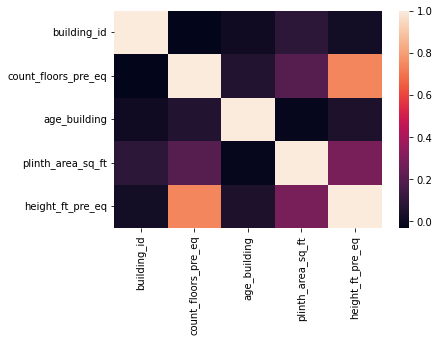

In [27]:
# creating correlation matrix
correlation = new_nepal.select_dtypes("number").drop(columns = "severe_damage").corr()
print(correlation)

# plot heatmap
sns.heatmap(correlation)

- Here darker colours represent little or no correlation while lighter one reprsents higher correlation.

- `count_floors_pre_eq` correlated with `height_ft_pre_eq` which definately true aas it signifies higher number of floor result in taller building.

so we have to drop one of the feature.

In [28]:
# Lets check the correlation of these 2 with target variable 

print(new_nepal["severe_damage"].corr(new_nepal["count_floors_pre_eq"]))
print(new_nepal["severe_damage"].corr(new_nepal["height_ft_pre_eq"])) 

0.0028926303725752113
-0.03847659083302046


- So i think we have to drop the first one `count_floors_pre_eq`. So lets modify our wrangle function ...

In [38]:
# New data after modification of wrangle 

new_nepal = wrangle(nepal_data)
new_nepal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 164002 to 234835
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   building_id             70836 non-null  int64 
 1   age_building            70836 non-null  int64 
 2   plinth_area_sq_ft       70836 non-null  int64 
 3   height_ft_pre_eq        70836 non-null  int64 
 4   land_surface_condition  70836 non-null  object
 5   foundation_type         70836 non-null  object
 6   roof_type               70836 non-null  object
 7   ground_floor_type       70836 non-null  object
 8   other_floor_type        70836 non-null  object
 9   position                70836 non-null  object
 10  plan_configuration      70836 non-null  object
 11  superstructure          70836 non-null  object
 12  severe_damage           70836 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 7.3+ MB


<AxesSubplot: >

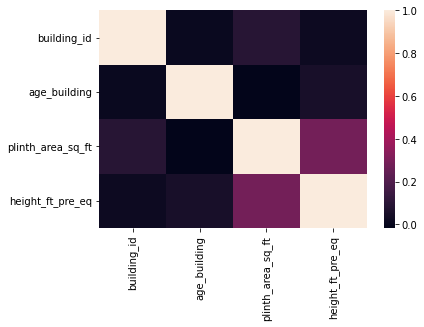

In [39]:
# Now again plotting  coorelation heatmap.
correlation = new_nepal.select_dtypes("number").drop(columns = "severe_damage").corr()
sns.heatmap(correlation)

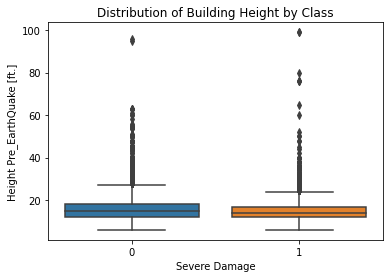

In [40]:
# Boxplot 
sns.boxplot(x ="severe_damage" , y="height_ft_pre_eq", data = new_nepal)

# Labels
plt.xlabel("Severe Damage")
plt.ylabel("Height Pre_EarthQuake [ft.]")
plt.title("Distribution of Building Height by Class");

### Boxplot Conclusion

- Most of Our Buildings that doesnt suffer damage are under height of 20. We also have some outliers.

- We also get an similar plot for building those suffer damage are under 20 also and contain more outliers.

> We cann't differentiate much through these distributions. 

1    45519
0    25317
Name: severe_damage, dtype: int64
1    0.642597
0    0.357403
Name: severe_damage, dtype: float64


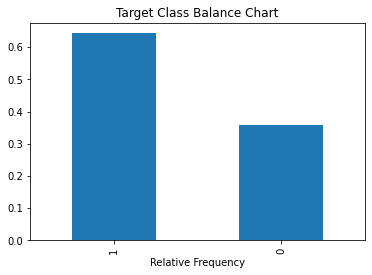

In [41]:
# Class Balance
print(new_nepal["severe_damage"].value_counts())

# To get percentage distribution 
print(new_nepal["severe_damage"].value_counts(normalize =True))

# Plotting chart
new_nepal["severe_damage"].value_counts(normalize =True).plot( kind = "bar", xlabel = "Relative Frequency", title = "Target Class Balance Chart");

- This is an case of Imbalance dataset.

    - Majority class is `severe_damage = 1 `

    - Minority class is `severe_damage = 0 `


In [42]:
# Storing proportion of class distribution.

majority_class_prop,minority_class_prop = new_nepal["severe_damage"].value_counts(normalize =True)
print(majority_class_prop,minority_class_prop)

0.6425969845841097 0.3574030154158902


### Creating Pivot Table

- Conversion of lengthy dataframe to a shorter or wider one.

In [34]:
foundation_pivot = pd.pivot_table(
    new_nepal, index = "foundation_type", values="severe_damage", aggfunc = np.mean
).sort_values(by= "severe_damage")

foundation_pivot

,severe_damage
foundation_type,
RC,0.026224
Bamboo/Timber,0.324074
Cement-Stone/Brick,0.421908
Mud mortar-Stone/Brick,0.687792
Other,0.818898


In this pivot we have : 

    - Left is index with different type of foundations.

    - Right is  proportion of buildings in each of group that suffer severe damage.

Lets plot it with bar chart

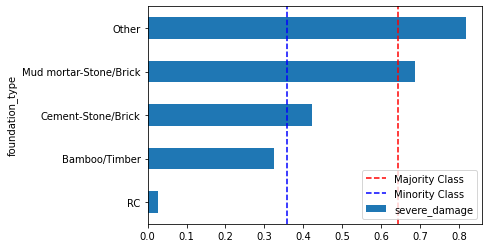

In [35]:
foundation_pivot.plot(kind="barh", legend =None)

plt.axvline(
    majority_class_prop, linestyle= "--", color ="red", label = "Majority Class"
)

plt.axvline(
    minority_class_prop, linestyle= "--", color ="blue", label = "Minority Class"
)

plt.legend(loc= "lower right")

In [36]:
# High and low Cardinality Features

new_nepal.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
superstructure            11
dtype: int64

- What i noticed is that our building_id is also sime kind of categoorical feature as it is unique name which have no information...

- So we drop it in wrangle function.

In [44]:
# Again call wrangle function with updated cardinality removal

new_nepal = wrangle(nepal_data)

new_nepal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 164002 to 234835
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age_building            70836 non-null  int64 
 1   plinth_area_sq_ft       70836 non-null  int64 
 2   height_ft_pre_eq        70836 non-null  int64 
 3   land_surface_condition  70836 non-null  object
 4   foundation_type         70836 non-null  object
 5   roof_type               70836 non-null  object
 6   ground_floor_type       70836 non-null  object
 7   other_floor_type        70836 non-null  object
 8   position                70836 non-null  object
 9   plan_configuration      70836 non-null  object
 10  superstructure          70836 non-null  object
 11  severe_damage           70836 non-null  int32 
dtypes: int32(1), int64(3), object(8)
memory usage: 6.8+ MB


# Time to Train-Test Split 

In [45]:
target = "severe_damage"

X = new_nepal.drop(columns=target)
y = new_nepal[target]

In [46]:
print(X.head())
print(y.head())

        age_building  plinth_area_sq_ft  height_ft_pre_eq  \
b_id                                                        
164002            20                560                18   
164081            21                200                12   
164089            18                315                20   
164098            45                290                13   
164103            21                230                13   

       land_surface_condition         foundation_type  \
b_id                                                    
164002                   Flat  Mud mortar-Stone/Brick   
164081                   Flat  Mud mortar-Stone/Brick   
164089                   Flat  Mud mortar-Stone/Brick   
164098                   Flat  Mud mortar-Stone/Brick   
164103                   Flat  Mud mortar-Stone/Brick   

                       roof_type ground_floor_type   other_floor_type  \
b_id                                                                    
164002  Bamboo/Timber-Ligh

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (56668, 11)
y_train shape: (56668,)
X_test shape: (14168, 11)
y_test shape: (14168,)


# Build Baseline and Model

In [48]:
# Accuracy baseline

acc_baseline = y_train.value_counts(normalize =True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.64


## Understanding  Logistic Regression

> Let assume that taller building ar emore likely to be get damage in erathquake as compare to smaller one which we can represent as :

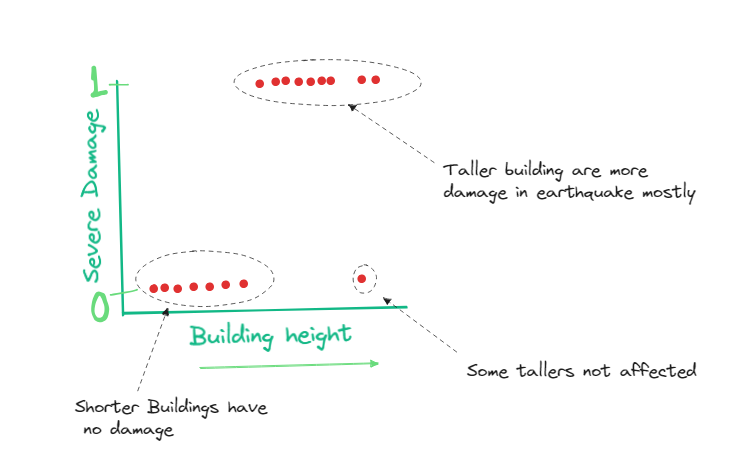


> What if we try to plot a linear line , it will be drawn in such a way that it will cover all data points.

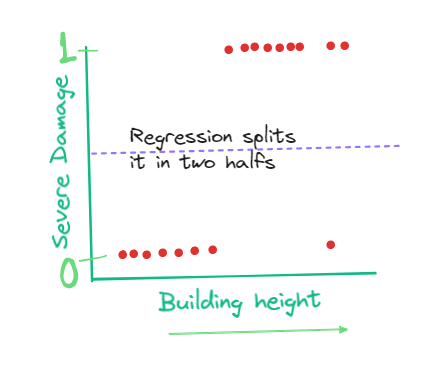

> So in this case linear regression setup itself in 0.5 and any new prediction will be in range of 0.5 which means nothing in our case

- Most of you are now just thinking of why we cann't just rotate a bit , it will help like this :

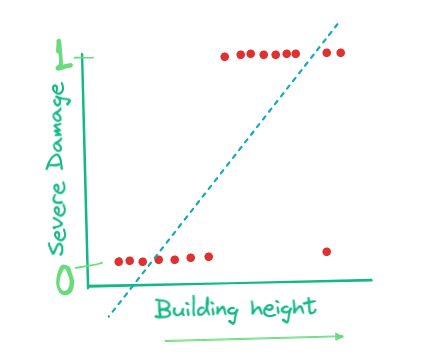

> Problem in this case is if we want to estimate any prediction for smaller building, it result in negative outcome which is completly out of box. And smaller for larger one. 

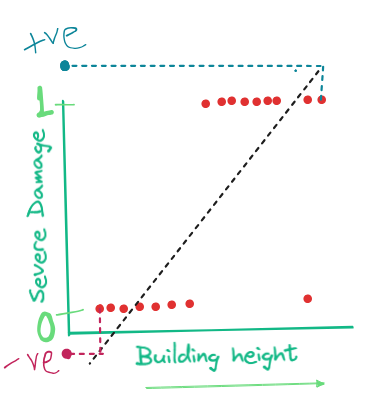

- Our model eqn

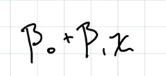

> We modified the function to a kind of sigmoid function 

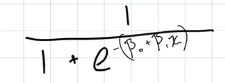


> Due to this now it will squash the ends results in acurate prediction.

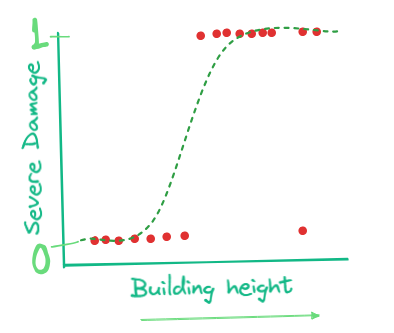


- So we solved our problem case of extreme end values .But what about mid range.

    - So we put an cuttoff line generally at mid(0.5) through which all the points below it taken as 0 and pointer higher then cutoff taken as 1. 

## Model Pipeline

In [49]:
# Build Model
model = make_pipeline(
    OneHotEncoder(use_cat_names =True),
    LogisticRegression(max_iter =1000)
)

# Fit Model
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'superstructure'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

## Evaluate

In [54]:
acc_train = accuracy_score(y_train,model.predict(X_train))

acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.71
Test Accuracy: 0.72


In [56]:
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.96750456 0.03249544]
 [0.48660426 0.51339574]
 [0.34610313 0.65389687]
 [0.40103794 0.59896206]
 [0.33221711 0.66778289]]


In [63]:
# Extracting feature and their importance
features =model.named_steps["onehotencoder"].get_feature_names_out()
importances = model.named_steps["logisticregression"].coef_[0]

In [66]:
# Odd ratios  
odds_ratio = pd.Series(np.exp(importances), index = features).sort_values()
odds_ratio.head()

superstructure_Brick, cement mortar    0.281767
foundation_type_RC                     0.354606
roof_type_RCC/RB/RBC                   0.384590
ground_floor_type_RC                   0.484116
other_floor_type_RCC/RB/RBC            0.544251
dtype: float64

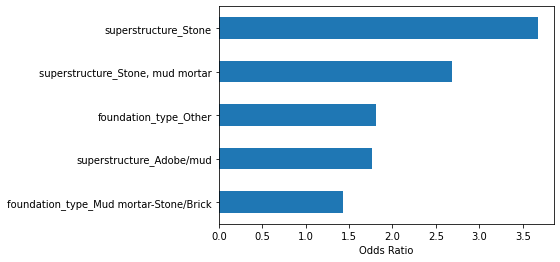

In [69]:
# Plotting five largest coefficients
odds_ratio.tail().plot(kind ="barh")
plt.xlabel("Odds Ratio");

Text(0.5, 0, 'Odds Ratio')

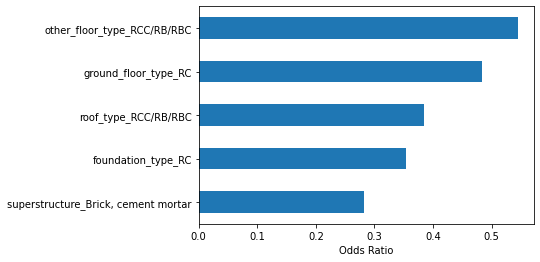

In [71]:
# Plotting five smallest coefficients
odds_ratio.head().plot(kind ="barh")
plt.xlabel("Odds Ratio")

- Smallest odd ratio of `superstructure_Brick,cement mortar` signifies that building made with it are 75 % less likely be have severe damage with earthquake.

- Whereas having `RC Reinforce Concrete` in different part of building structure gratly reduce likelihood of building suffering severe damage

# Applying Decision Tree

    - create a model and explain working for better result. 

In [73]:
#Library 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OrdinalEncoder

- Evertything is just as we want

## Split

In [74]:
# Creating feature matrix and target vector
target = "severe_damage"

X = new_nepal.drop(columns=target)
y = new_nepal[target]

### What is Vaidation set and why it is used ??

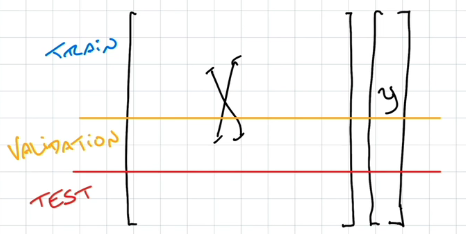

    - Train data is used for model training.
    
    - Test data is used for checking model performance.
    
    - Validation data is used by data scientists for tuning model.

So it works in a way that you train data using `train set` , then if there is any hyperparameter you want to set , then to get clue wether model is generalized or not you use mini test data called `Validation set`. and at last to get prediction or actual test ,you provide `test set`. 

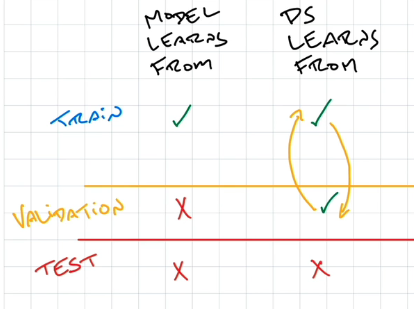


In [77]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size =0.2, random_state =42
)

# Creating validation set
X_train, X_test, y_train, y_test = train_test_split(
    X_train,y_train,test_size =0.2, random_state =42
)

In [79]:
# Baseline
acc_baseline = y_train.value_counts(normalize =True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.64


## HOW DECISION TREE WORK ?

- It starts with all of training observation and group it together in a single node.
    - In our case our training data has two categories `severe` and `non-severe` which looks like :

        - Proportion of `severe` is 2/3.

        - Proportion of `non-severe` is 1/3.

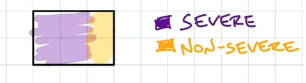

- So now decision tree take data in single node and devide it into 2 child node. and devision take place in such a way that the child node are pure in itself.  

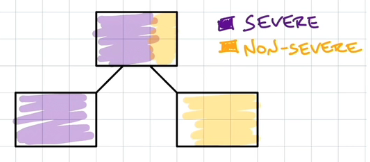

- But it doesnt always reach in pure devision in first split, means splitting must have mixture but in little proportion as compare to parents. 

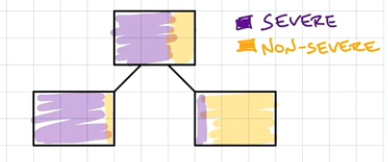

- So it will do splitting until it reaches pure node.

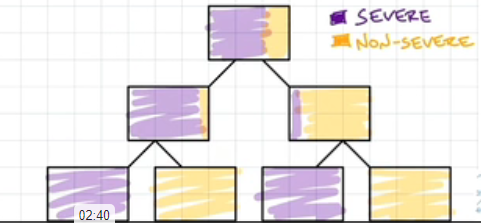



## Some Terminologies

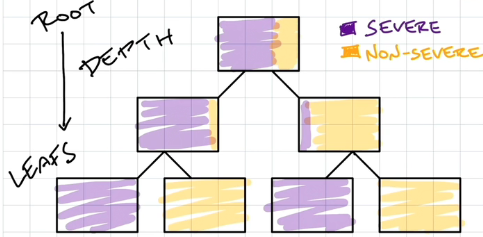

`root` refers to starting node.

`leaf` refers to end pure node.

`depth` number of splits from impure to pure node. 

## Internal Insight of Decision tree

- So decision try to come with all the train feature and find the one through which it can split node to its pure form , and this process is done by experiments. In this way try it with multiple features and expreiment with all those , so in final come up with best pure split.

    - Lets understand with it our train feature height. As we know in our data building height ranges from 5 to approx 100 feet. so it experimentaly finds the cuttoff such that it test in a way that the subset will goes to complte split (more purity than parent), and repeat process untill complete split occurs.

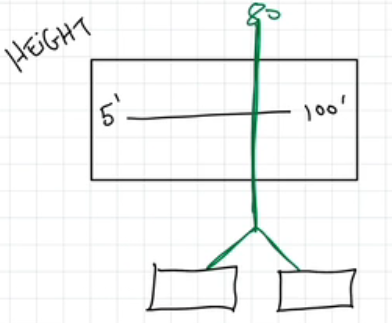



- Now we understand the `mechanism of decision tree`. Its time to understand `what is ordinal encoding ?`

- Ordinal encoding works in such a way that it collects up all the unique category from data and asssign them unique integer.

    - For Example, Think of foundation in our model if we apply ordinal encoding it seems like :

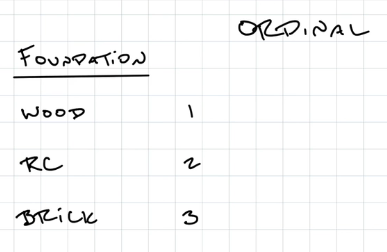

### Why we use it with decision tree only not regression ?

- Linear model works on distance (which means we have to add number). So in this way we cannot work , Lets understand it simply .

> Our ordinal encoding assign wood as 1 above and RC as 2 , for linear regression if we work , it will think that 1 wood + 1 wood = 1 RC which definately not right.

- In case of decision tree, algorithm works in such a way that it find the cutoff split so it can convert it in pure node. So here ordinal category gives more reliablity to model to provide pure ordinal to categories make it easy for model to split.

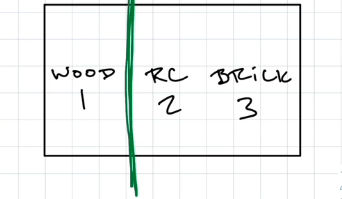

In [80]:
# Model pipeline
model =make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state=42)
)

# Fit Model

model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'superstructure'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'dat...
E-shape                             7
H-shape                             8
Others                              9
Building with Central Courtyard    10
NaN                                -2
dtype: int64},
                                         {'col': 'superstructure',
                                          'data_type': dtype('O'),
                                          'mapping': Stone, mud mortar        1
Stone                    2
RC, engineered           3
Brick, cement mortar     4
Adobe/mud                5
Timber                   6
RC, non-engineered       7
Brick, mud mortar        8
Stone, cement mortar     9
Bamboo                  10
Other                   11
NaN                     -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

- `Hyperparameter Tuning` using validation set

In [81]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.98
Validation Accuracy: 0.65


### Wow😲😲

- Our training acuuracy is almost 100 % , but our test accuracy cant even reach baseline..😒.

- This mean our model is still not generalized.

#### `THINKING OF PROBLEM ?`

- Have u ever know about `flexiblity` characterstic of decision tree. I think that's problem. 

> Flexiblity of decision tree allows our model keen to fit the data so well such that it also describing little pecularities (random characterstics) which leads to loose model ability to generalize for other dataset. 

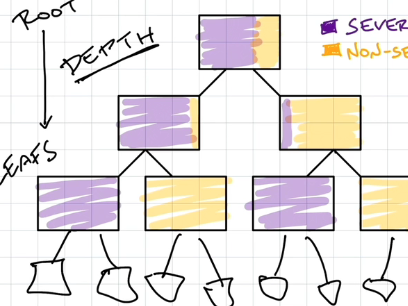

> In ml terms if we conclude , then it means `higher the depth : more the flexiblity `. means greater the chance of overfitting.




In [83]:
# Depth of our current fitted tree  

tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 49


- Creating range of possible values for max depth. (HYPERPARAMETER TUNING)

In [86]:
# Possible hyperparameters for depth 
depth_hyperparams = range(1, 50, 2)


In [87]:
# Collecting up various scores for different range

# Empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Model initialized with "max_depth" of "d"
    test_model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(random_state=42, max_depth=d)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val,y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.7071072484228174, 0.7117395332421582, 0.7162394670666608]
Validation Accuracy Scores: [0.7157679277244494, 0.7206380575945793, 0.722261434217956]


- Plotting scores to get most relevant one using `VALIDATION CURVE`.

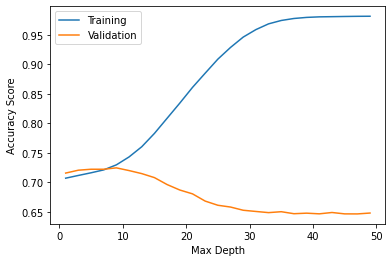

In [89]:
plt.plot(depth_hyperparams,training_acc, label = "Training")
plt.plot(depth_hyperparams,validation_acc, label = "Validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

- So our best max depth is 6 after that it get diverges 

In [94]:
# Retrain Model 
# Model pipeline
model =make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state=42, max_depth=6)
)

# Fit Model

model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'superstructure'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'dat...
Others                              9
Building with Central Courtyard    10
NaN                                -2
dtype: int64},
                                         {'col': 'superstructure',
                                          'data_type': dtype('O'),
                                          'mapping': Stone, mud mortar        1
Stone                    2
RC, engineered           3
Brick, cement mortar     4
Adobe/mud                5
Timber                   6
RC, non-engineered       7
Brick, mud mortar        8
Stone, cement mortar     9
Bamboo                  10
Other                   11
NaN                     -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [95]:
# Rechecking Accuracy

acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.72
Validation Accuracy: 0.72


- I got it !!!!😁

#### Working on test set 


In [96]:
test_acc = model.score(X_test,y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.72


# RESULT COMMUNICATION

## PLOTTING TREE MODEL 

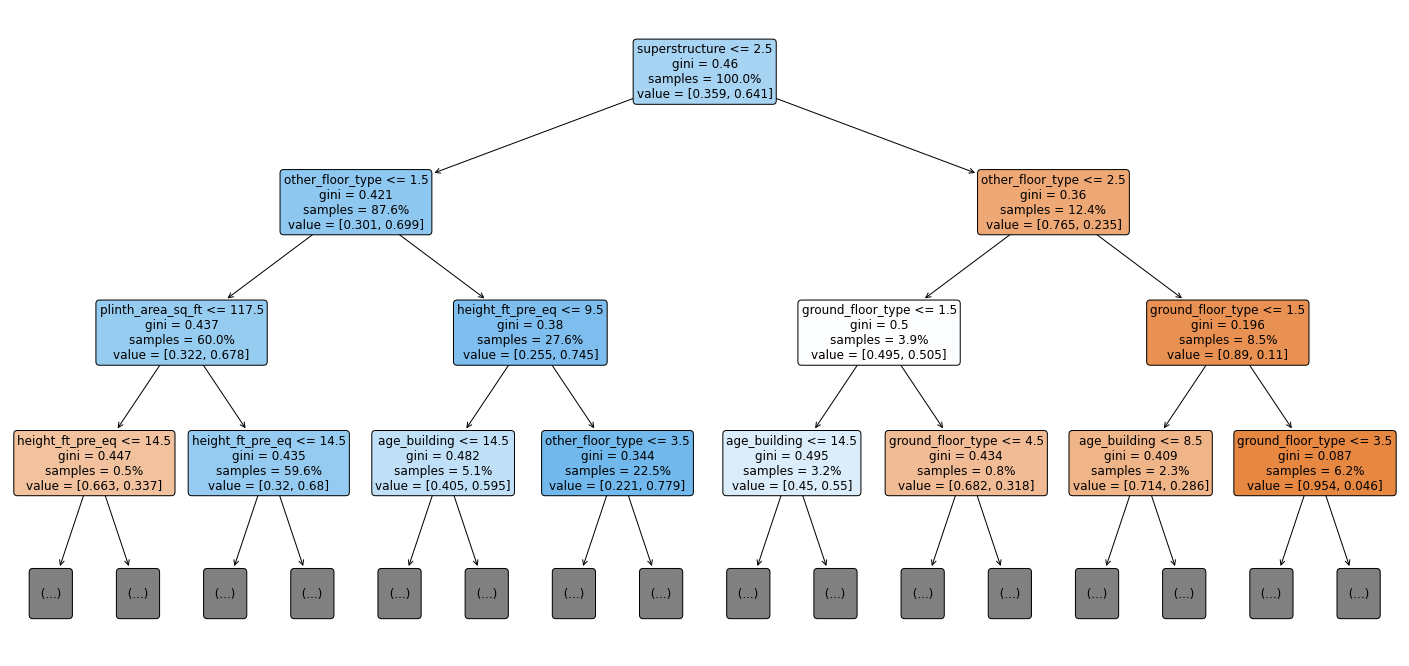

In [97]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

- Extracting feature importances and plot them.

In [99]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq'], dtype='object')
Importances: [0.03515085 0.04618639 0.08839161]


In [105]:
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.head()

position                  0.000644
plan_configuration        0.004847
foundation_type           0.005206
roof_type                 0.007620
land_surface_condition    0.020759
dtype: float64

### PLOTTING GINNI IMPURITY BAR CHART


Text(0, 0.5, 'Feature')

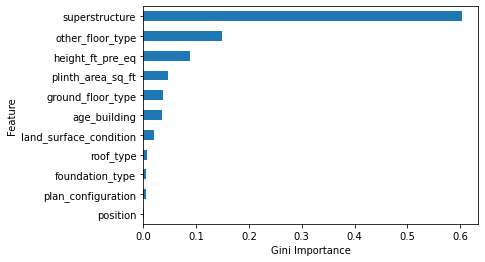

In [106]:
feat_imp.plot(kind ="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")